#Single Feature/Variable Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("homeprice.csv")
df.shape

(5, 2)

In [7]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


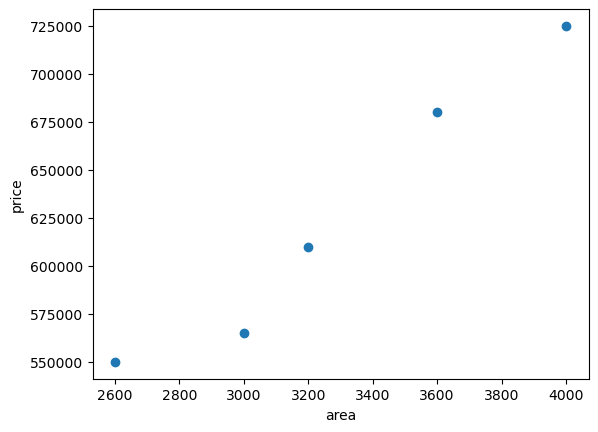

In [9]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price)
plt.show()

In [11]:
lr= linear_model.LinearRegression()
lr.fit(df[['area']],df.price)
lr.predict([[5200]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([886712.32876712])

In [13]:
lr.coef_

array([135.78767123])

In [15]:
lr.intercept_

180616.43835616432

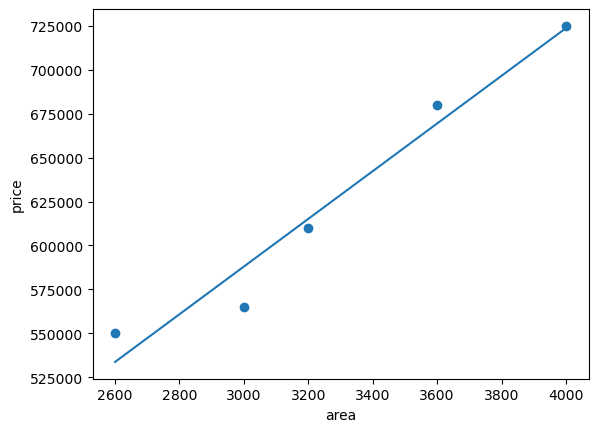

In [17]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price)
plt.plot(df.area,lr.coef_*df.area+lr.intercept_)
plt.show()

In [19]:
ndf=pd.DataFrame({
    "area":[1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]
})
ndf['price']=lr.predict(ndf)
ndf.tail(5)

,area,price
8,4750,8.256079e+05
9,2300,4.929281e+05
10,9000,1.402705e+06
11,8600,1.348390e+06
12,7100,1.144709e+06


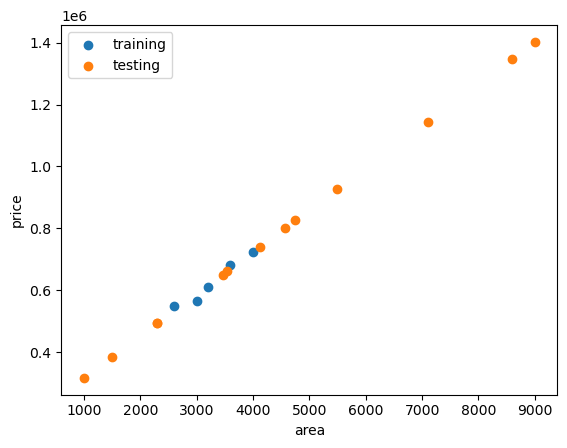

In [21]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,label="training")
plt.scatter(ndf.area,ndf.price,label="testing")
plt.legend()
plt.show()

In [23]:
lr.score(ndf[['area']],ndf.price)

1.0

In [25]:
cpdf=pd.read_csv("canada_per_capita_income.csv")
cpdf.head(5)

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


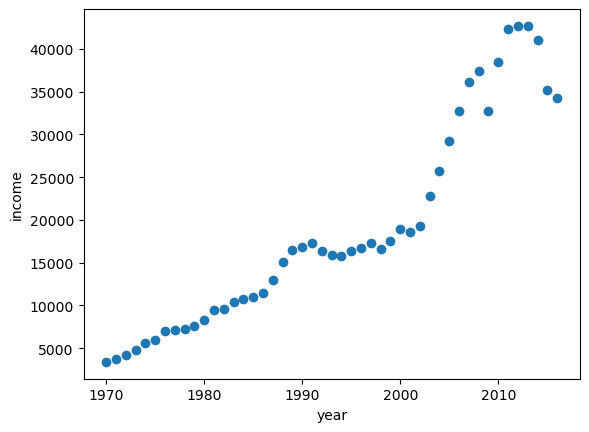

In [27]:
plt.xlabel("year")
plt.ylabel("income")
plt.scatter(cpdf.year,cpdf.income)
plt.show()

In [29]:
model=linear_model.LinearRegression()
model.fit(cpdf[['year']],cpdf.income)
model.coef_

array([828.46507522])

In [31]:
model.intercept_

-1632210.7578554575

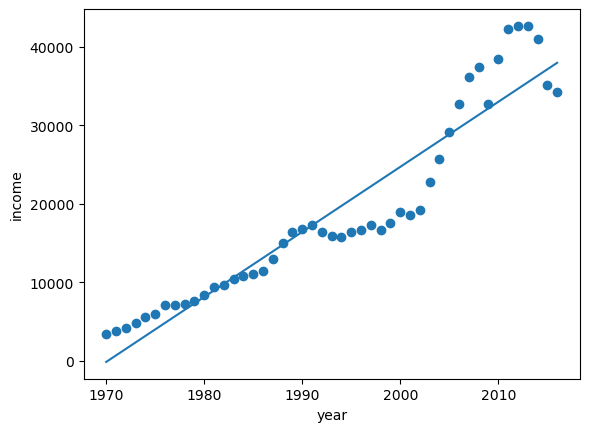

In [33]:
plt.xlabel("year")
plt.ylabel("income")
plt.scatter(cpdf.year,cpdf.income)
plt.plot(cpdf.year,model.coef_*cpdf.year+model.intercept_)
plt.show()

In [35]:
model.predict([[2020]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [37]:
model.predict(pd.DataFrame({
    "year":[2021,2022,2023,2024,2025]
}))

array([42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053])

#Multiple Variable/Feature Linear Regression

In [79]:
df=pd.read_csv("houseprice_mv.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [83]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [85]:
y=df.price
X=df.drop(columns='price')

In [87]:
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.2,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [89]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

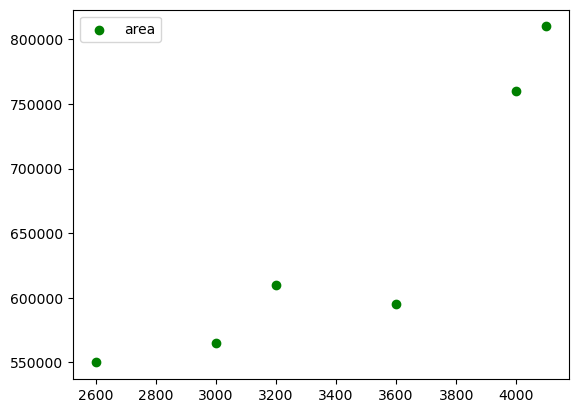

In [93]:
plt.scatter(X['area'],y,label="area",color="green")
plt.legend()
plt.show()

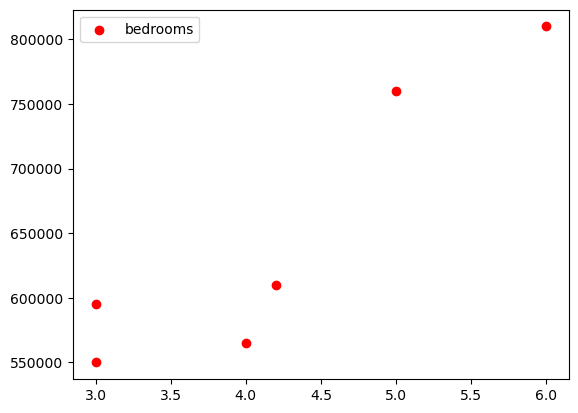

In [95]:
plt.scatter(X['bedrooms'],y,label="bedrooms",color="red")
plt.legend()
plt.show()

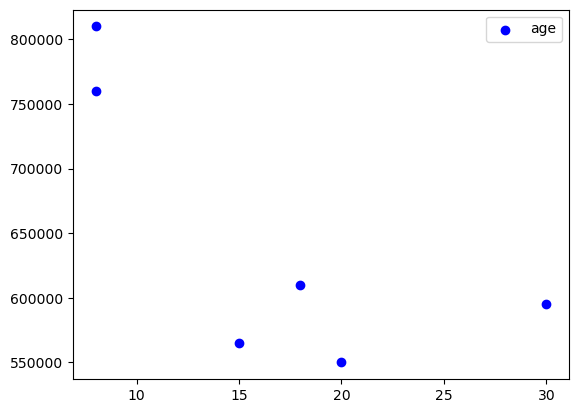

In [99]:
plt.scatter(X['age'],y,label="age",color="blue")
plt.legend()
plt.show()

In [101]:
mvm=linear_model.LinearRegression()
mvm.fit(X,y)
mvm.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [103]:
mvm.intercept_

231586.00639409182

In [105]:
mvm.predict([[3000, 3, 40]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([490833.34243748])

In [113]:
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.2,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [115]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

#Hiring Data Analysis

In [187]:
hiring_data = {
    'experience': ['zero','zero', 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
    'test_score': [8, 8, 6, 10, 9, 7, None, 7],
    'interview_score': [9, 6, 7, 10, 6, 10, 7, 8],
    'salary': [50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000]
}
df=pd.DataFrame(hiring_data)
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [189]:
from word2number import w2n
import math
df.test_score = df.test_score.fillna(math.floor(df['test_score'].mean()))
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [191]:
y=df.salary
X=df.drop(columns='salary')
X

,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [193]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [195]:
m=linear_model.LinearRegression()
m.fit(X,y)
m.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [197]:
m.intercept_

14992.65144669314

In [199]:
m.predict([[2,9,6]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [201]:
m.predict([[12,10,10]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])